In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

## Import Data

In [42]:
# import eps data
earnings_path = 'data\\processed\\df_quarter_eps_average_08_09.csv'
key_path = 'data\\processed\\df_price07_18.csv'
training_price_path = 'data\\processed\\df_price07_18.csv'
dividend_path = 'data\\processed\\df_monthly_div_07_18.csv'


df = pd.read_csv(earnings_path)
df.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df.index = df['Stock']
df.drop('Stock', axis=1, inplace = True)

df_key = pd.read_csv(key_path)
df_key.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
new = df_key['Stock'].str.split('_', expand=True)

df_key['symbol'] = new[0]
df_key['company'] = new[1]
df_key.index = df_key['symbol']
df_key = df_key[['symbol', 'company']]
df_key.sort_index(inplace=True)

df_price = pd.read_csv(key_path)
df_price.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
new = df_price['Stock'].str.split('_', expand=True)
df_price['symbol'] = new[0]
df_price.index = df_price['symbol']
df_price.drop(['Stock', 'symbol'], axis=1, inplace = True)


df_div = pd.read_csv(dividend_path)
df_div.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df_div.index = df_div['Stock']
df_div.drop('Stock', axis=1, inplace = True)
#df
#df_key

## Limit stocks to SP500 that traded daily throughout the duration

In [43]:
# define indices

idx_key = df_key.index
idx = df.index
idx_div = df_div.index
# drop stocks from eps dataframe

idx_diff1 = idx.difference(idx_key)
df.drop(idx_diff1, inplace=True)

# drop stocks missing from 2019 data
df.drop(['BBT', 'CBS', 'CELG', 'JEC', 'KLAC', 'NEM', 'STI', 'SYMC', 'XRX'], inplace = True)
df.shape

(346, 2)

## Exploratory Scatterplot

<IPython.core.display.Javascript object>


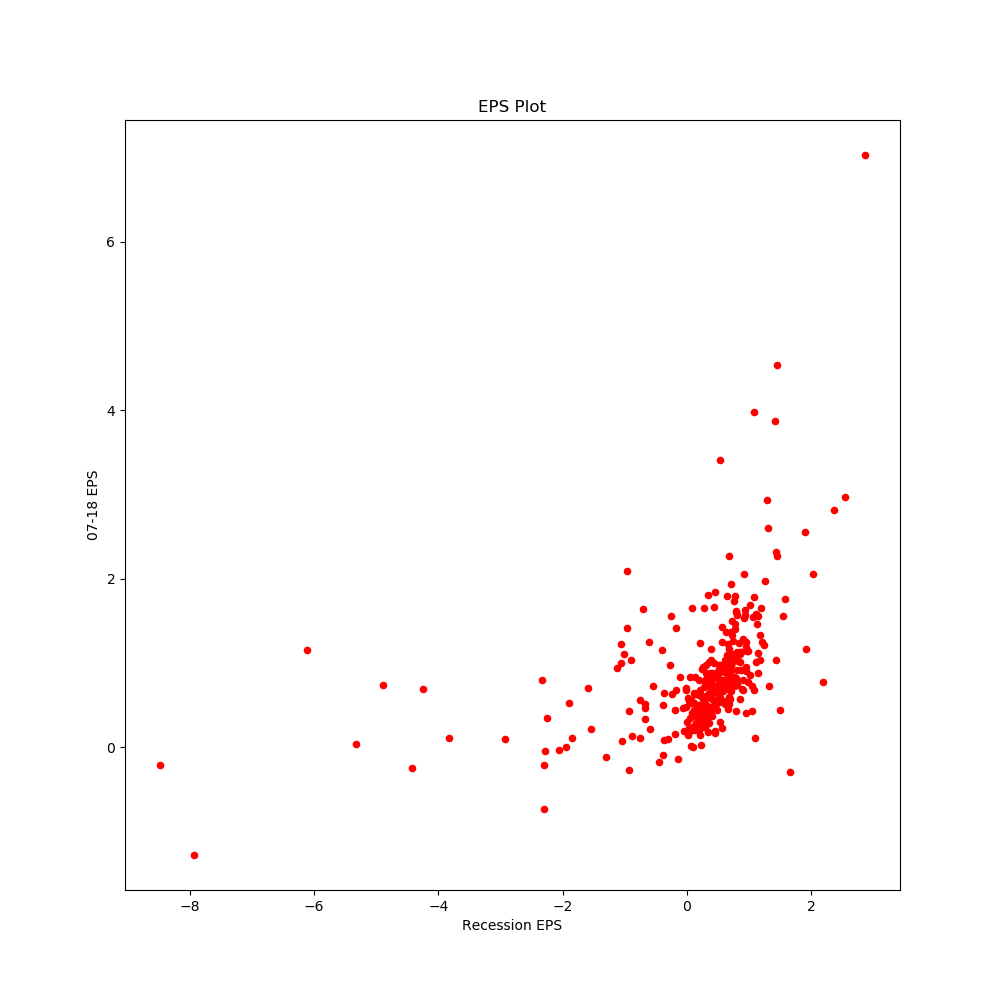

In [44]:
# eps plot

df.plot(kind='scatter', x='Recession EPS', y='07-18 EPS', title='EPS Plot', figsize=(10,10), color='r')

## Implementing Hypothesis - EPS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>


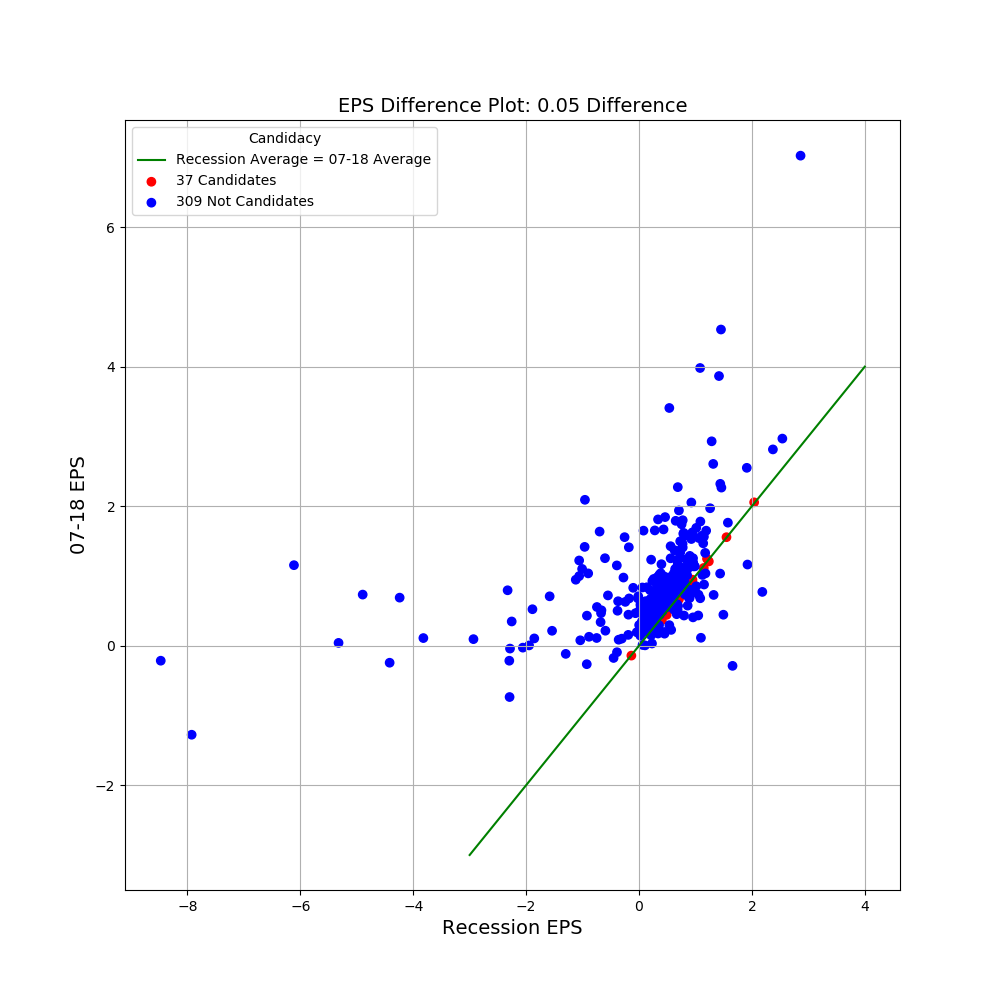

<IPython.core.display.Javascript object>


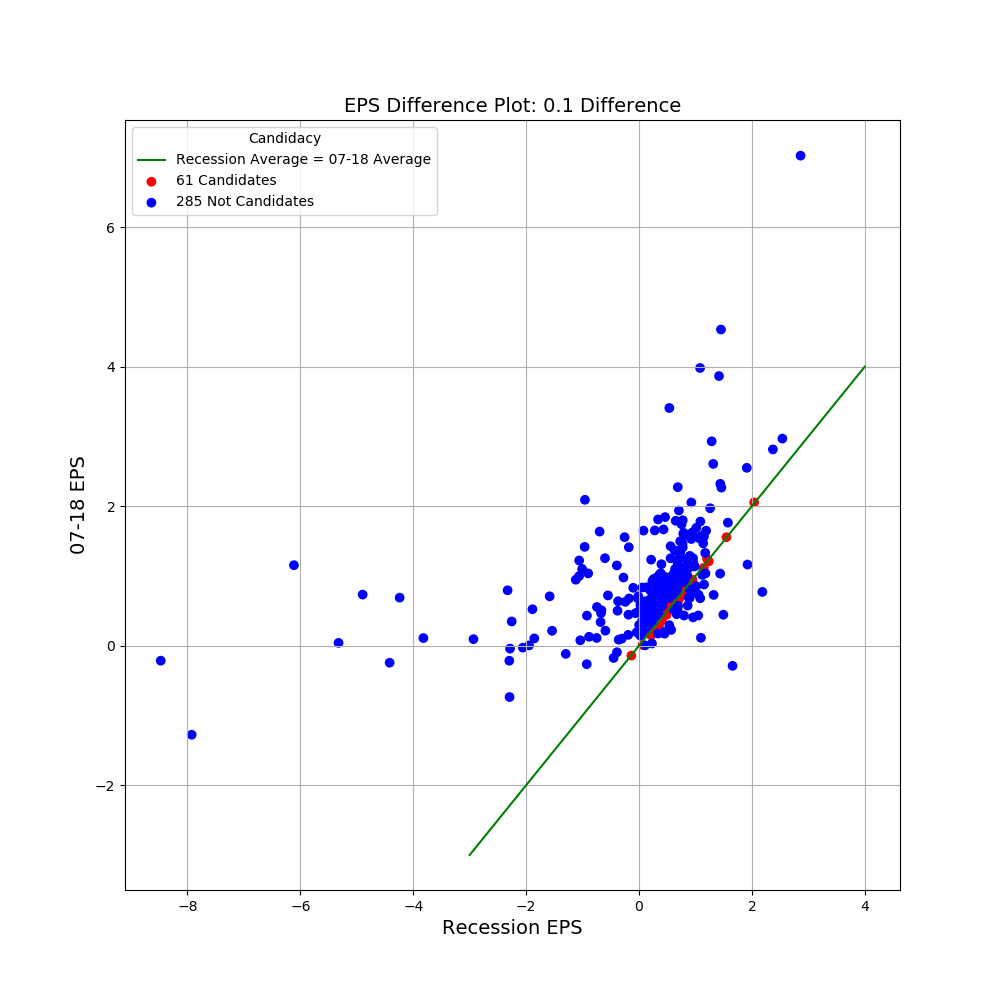

<IPython.core.display.Javascript object>


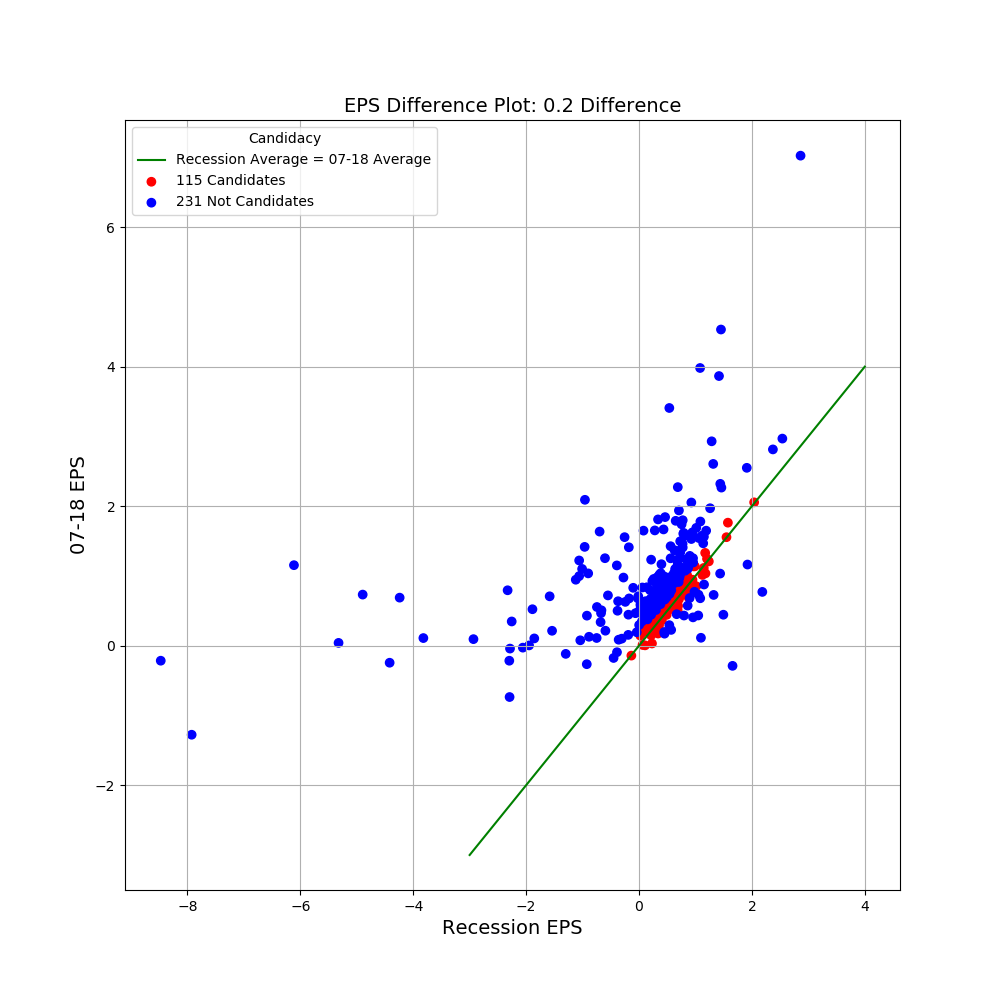

In [45]:
# define colors assignment

colors = {1:'red', 0:'blue'}
sub_title_font =14
legend_font =8
axis_font = 10
x = np.linspace(-3, 4, 100)
y=x

for diff in [0.05, 0.1, 0.2]:
    df['hypothesis']=np.where(abs(df['Recession EPS']-df['07-18 EPS']) <= diff, 1, 0)

    df_cand = df[df['hypothesis']==1]
    df_not = df[df['hypothesis']==0]
    
    df_cand['colors'] = 'red'
    df_not['colors'] = 'blue'
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    cand = ax.scatter(df_cand['Recession EPS'], df_cand['07-18 EPS'], c=df_cand.colors, label='{} Candidates'.format(len(df_cand.index)))
    not_cand = ax.scatter(df_not['Recession EPS'], df_not['07-18 EPS'], c=df_not.colors, label='{} Not Candidates'.format(len(df_not.index)))
    line = ax.plot(x, y, c="green", label='Recession Average = 07-18 Average')

    plt.xlabel('Recession EPS', fontsize=sub_title_font)
    plt.ylabel('07-18 EPS', fontsize=sub_title_font)
    plt.title('EPS Difference Plot: {} Difference'.format(diff), fontsize=sub_title_font)
    ax.tick_params(axis="x", labelsize=axis_font)
    ax.tick_params(axis="y", labelsize=axis_font)

    plt.grid(which='major')
    ax.legend(loc = 'upper left', title='Candidacy')
    plt.show()

## Filter stocks to ideal Candidate pool

### Let's pick the top 20% of resistant stocks for our pool

In [46]:
# build candidate pool from EPS

ratio_eps = int(round(len(df.index)*0.2))
df_eps_cand = df
df_eps_cand['difference'] = abs(df['Recession EPS']-df['07-18 EPS'])
df_eps_cand.sort_values(by=['difference'], inplace=True)
df_eps_cand = df_eps_cand.iloc[0:ratio_eps, [0, 1, 3]]

In [47]:
# sort stocks by difference between average and recession eps
# 20% smallest differences become candidate stocks

ratio = int(round(len(df.index)*0.2))
df['difference'] = abs(df['Recession EPS'] - df['07-18 EPS'])
df.sort_values(by=['difference'], inplace=True)
df['colors'] = ''

df_cand = df.iloc[0:ratio, :]
df_not = df.iloc[ratio:, :]

df_cand['colors'] = 'red'
df_not['colors'] = 'blue'

print('Candidate df shape: {}'.format(df_cand.shape))
print('Not Candidate df shape: {}'.format(df_not.shape))

Candidate df shape: (69, 5)
Not Candidate df shape: (277, 5)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


<IPython.core.display.Javascript object>


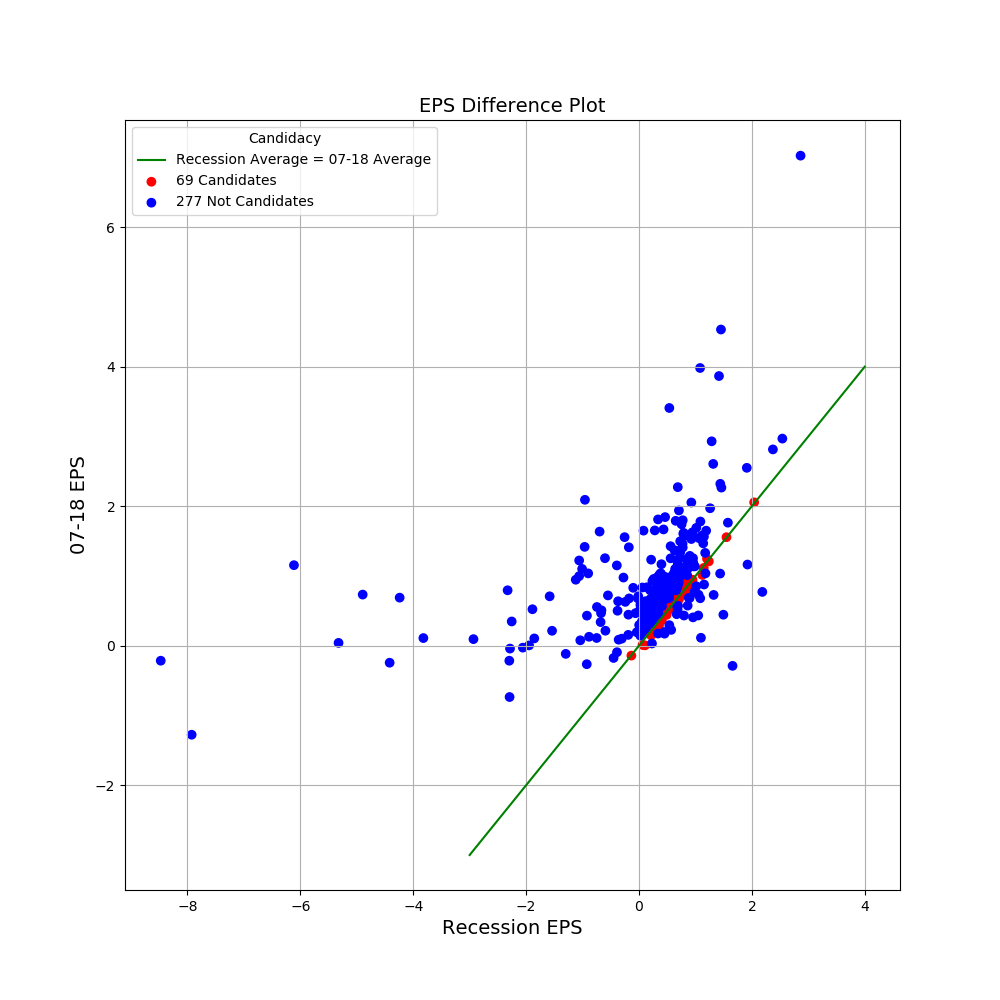

In [48]:
# plot metric decision boundary
sub_title_font =14
legend_font =8
axis_font = 10
x = np.linspace(-3, 4, 100)
y=x

fig, ax = plt.subplots(1, 1, figsize=(10,10))
cand = ax.scatter(df_cand['Recession EPS'], df_cand['07-18 EPS'], c=df_cand.colors, label='{} Candidates'.format(len(df_cand.index)))
not_cand = ax.scatter(df_not['Recession EPS'], df_not['07-18 EPS'], c=df_not.colors, label='{} Not Candidates'.format(len(df_not.index)))
line = ax.plot(x, y, c="green", label='Recession Average = 07-18 Average')

plt.xlabel('Recession EPS', fontsize=sub_title_font)
plt.ylabel('07-18 EPS', fontsize=sub_title_font)
plt.title('EPS Difference Plot', fontsize=sub_title_font)
ax.tick_params(axis="x", labelsize=axis_font)
ax.tick_params(axis="y", labelsize=axis_font)

plt.grid(which='major')
ax.legend(loc = 'upper left', title='Candidacy')
plt.show()

### Print list of Candidate Stocks

In [49]:
df_cand.sort_index(inplace=True)
for i in df_cand.index:
    print(i, df_key.loc[i, 'company'])

ABC AMERISOURCEBERGEN CORP
ADM ARCHER DANIELS MIDLAND CO
ADP AUTOMATIC DATA PROCESSING INC
ADSK AUTODESK INC
AEP AMERICAN ELECTRIC POWER CO INC
AIV APARTMENT INVESTMENT & MGMT CO
AKAM AKAMAI TECHNOLOGIES INC
ALGN ALIGN TECHNOLOGY INC
ALXN ALEXION PHARMACEUTICALS INC
AME AMETEK INC NEW
BAX BAXTER INTERNATIONAL INC
BBY BEST BUY COMPANY INC
BDX BECTON DICKINSON & CO
CAH CARDINAL HEALTH INC
CCL CARNIVAL CORP
CERN CERNER CORP
CHD CHURCH & DWIGHT INC
CMS C M S ENERGY CORP
CNP CENTERPOINT ENERGY INC
CPB CAMPBELL SOUP CO
CRM SALESFORCE COM INC
CSCO CISCO SYSTEMS INC
CSX C S X CORP
CVX CHEVRON
DHR DANAHER CORP
DVA DAVITA
EIX EDISON INTERNATIONAL
EMR EMERSON ELECTRIC CO
ESS ESSEX PROPERTY TRUST INC
EW EDWARDS LIFESCIENCES CORP
FAST FASTENAL COMPANY
FLIR FLIR SYSTEMS INC
FMC F M C CORP
GRMN GARMIN LTD
HAL HALLIBURTON COMPANY
HRB BLOCK H & R INC
HRL HORMEL FOODS CORP
IRM IRON MOUNTAIN
JNJ JOHNSON & JOHNSON
JNPR JUNIPER NETWORKS INC
K KELLOGG CO
KO COCA COLA CO
KR KROGER COMPANY
LNT ALLIANT ENERGY 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Build Returns of everything

In [50]:
# monthly returns

start_dates = ['2010-01-04', '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-03', '2010-06-01', 
              '2010-07-01', '2010-08-02', '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01', 
              '2011-01-03', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-02', '2011-06-01', 
              '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-03', '2011-11-01', '2011-12-01', 
              '2012-01-03', '2012-02-01', '2012-03-01', '2012-04-02', '2012-05-01', '2012-06-01', 
              '2012-07-02', '2012-08-01', '2012-09-04', '2012-10-01', '2012-11-01', '2012-12-03',
              '2013-01-02', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-03', 
              '2013-07-01', '2013-08-01', '2013-09-03', '2013-10-01', '2013-11-01', '2013-12-02', 
              '2014-01-02', '2014-02-03', '2014-03-03', '2014-04-01', '2014-05-01', '2014-06-02', 
              '2014-07-01', '2014-08-01', '2014-09-02', '2013-10-01', '2014-11-03', '2014-12-01', 
              '2015-01-02', '2015-02-02', '2015-03-02', '2015-04-01', '2015-05-01', '2015-06-01',
              '2015-07-01', '2015-08-03', '2015-09-01', '2015-10-01', '2015-11-02', '2015-12-01', 
              '2016-01-04', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-02', '2016-06-01', 
              '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-03', '2016-11-01', '2016-12-01', 
              '2017-01-03', '2017-02-01', '2017-03-01', '2017-04-03', '2017-05-01', '2017-06-01', 
              '2017-07-03', '2017-08-01', '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01', 
              '2018-01-02', '2018-02-01', '2018-03-01', '2018-04-02', '2018-05-01', '2018-06-01', 
              '2018-07-02', '2018-08-01', '2018-09-04', '2018-10-01', '2018-11-01', '2018-12-03']

end_dates = ['2010-01-29', '2010-02-26', '2010-03-31', '2010-04-30', '2010-05-28', '2010-06-30', 
            '2010-07-30', '2010-08-31', '2010-09-30', '2010-10-29', '2010-11-30', '2010-12-31', 
            '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29', '2011-05-31', '2011-06-30', 
            '2011-07-29', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30', 
            '2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30', '2012-05-31', '2012-06-29', 
            '2012-07-31', '2012-08-31', '2012-09-28', '2012-10-31', '2012-11-30', '2012-12-31', 
            '2013-01-31', '2013-02-28', '2013-03-28', '2013-04-30', '2013-05-31', '2013-06-28', 
            '2013-07-31', '2013-08-30', '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31', 
            '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-30', '2014-06-30', 
            '2014-07-31', '2014-08-29', '2014-09-30', '2014-10-31', '2014-11-28', '2014-12-31', 
            '2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30', '2015-05-29', '2015-06-30', 
            '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31', 
            '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29', '2016-05-31', '2016-06-30', 
            '2016-07-29', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30', 
            '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30', 
            '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29', 
            '2018-01-31', '2018-02-28', '2018-03-29', '2018-04-30', '2018-05-31', '2018-06-29', 
            '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30', '2018-12-31']

# initialize risk free rates for each year
# deannualize from the start of each year

rfr10 = (1+0.0013)**(1/3) - 1
rfr11 = (1+0.0005)**(1/3) - 1
rfr12 = (1+0.0011)**(1/3) - 1
rfr13 = (1+0.00075)**(1/3) - 1
rfr14 = (1+0.0004)**(1/3) - 1
rfr15 = (1+0.0004)**(1/3) - 1
rfr16 = (1+0.0035)**(1/3) - 1
rfr17 = (1+0.0099)**(1/3) - 1
rfr18 = (1+0.0185)**(1/3) - 1

In [51]:
# returns function for 2010-2018 data

def create_returns(dataframe):
    temp_returns = pd.DataFrame(index=dataframe.index)
    
    for start, end in zip(start_dates, end_dates):
        temp_returns[end] = df_price[end] - df_price[start]

    idx_div_diff = idx_div.difference(dataframe.index)
    temp_div = df_div.drop(idx_div_diff) 
    total_returns = temp_returns + temp_div
    percent_returns = pd.DataFrame(index=dataframe.index)
    
    for start, end in zip(start_dates, end_dates):
        percent_returns[end] = total_returns[end]/df_price[start]
    #
    actual_returns = pd.DataFrame(index = dataframe.index, columns = percent_returns.columns)
    
    actual_returns.iloc[:, 0:12] = percent_returns.iloc[:, 0:12] - rfr10
    actual_returns.iloc[:, 12:24] = percent_returns.iloc[:, 12:24] - rfr11
    actual_returns.iloc[:, 24:36] = percent_returns.iloc[:, 24:36] - rfr12
    actual_returns.iloc[:, 36:48] = percent_returns.iloc[:, 36:48] - rfr13
    actual_returns.iloc[:, 48:60] = percent_returns.iloc[:, 48:60] - rfr14
    actual_returns.iloc[:, 60:72] = percent_returns.iloc[:, 60:72] - rfr15
    actual_returns.iloc[:, 72:84] = percent_returns.iloc[:, 72:84] - rfr16
    actual_returns.iloc[:, 84:96] = percent_returns.iloc[:, 84:96] - rfr17
    actual_returns.iloc[:, 96:108] = percent_returns.iloc[:, 96:108] - rfr18
    
    actual_returns = actual_returns.astype(float)
    return actual_returns

In [52]:
df_returns = create_returns(df_price)

In [53]:
df_returns

,2010-01-29,2010-02-26,2010-03-31,2010-04-30,2010-05-28,2010-06-30,2010-07-30,2010-08-31,2010-09-30,2010-10-29,...,2018-03-29,2018-04-30,2018-05-31,2018-06-29,2018-07-31,2018-08-31,2018-09-28,2018-10-31,2018-11-30,2018-12-31
symbol,,,,,,,,,,,,,,,,,,,,,
A,-0.072465,0.061152,0.038775,0.015572,-0.132690,-0.033766,0.096551,-0.101092,0.186570,0.078326,...,-0.084792,0.009638,0.011709,-0.074563,0.055710,0.020897,0.056235,-0.062307,-0.001601,-0.099045
AAP,-0.089286,0.009423,0.009474,0.047406,-0.163751,-0.110901,0.114852,-0.108485,0.025090,0.094112,...,-0.022930,0.050581,0.034503,-0.027560,0.054765,0.050984,0.017862,-0.082074,0.040982,-0.099804
AAPL,-0.088301,-0.007096,0.075301,0.029458,-0.155093,-0.089121,0.092722,-0.124983,0.087463,0.097501,...,-0.023389,0.083613,0.087474,-0.059560,0.017930,-0.015822,-0.055944,-0.121063,0.010024,-0.076592
ABC,-0.042151,0.020310,0.116073,0.054345,-0.118210,-0.068293,0.112061,-0.106615,0.075072,0.067366,...,-0.023610,0.010558,0.018275,-0.045528,0.097225,0.008510,0.037010,-0.135225,0.010716,-0.118404
ABT,-0.043437,-0.022095,-0.021112,-0.035587,-0.083526,0.038234,0.067372,0.092669,0.022427,0.048021,...,0.047528,0.069654,-0.033148,0.041870,0.062925,0.043410,-0.000471,-0.061075,-0.059358,-0.129172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XOM,0.190958,0.079854,0.042235,0.171001,-0.158006,-0.139645,0.058237,-0.124500,0.129601,-0.065100,...,0.025891,-0.070649,-0.041311,0.016214,0.001027,-0.002199,-0.098099,-0.088968,-0.029668,-0.102131
XRAY,-0.085436,-0.049923,0.023828,0.029188,-0.078640,0.046680,0.054303,-0.053114,0.055607,-0.011595,...,-0.025401,-0.117346,-0.028753,0.014143,-0.015298,-0.043487,-0.058371,0.039942,-0.045545,-0.156567
XRX,-0.002036,-0.082496,0.077822,0.121638,-0.108709,-0.028005,0.097584,-0.039804,0.045451,0.111741,...,0.057680,0.016019,-0.034502,-0.011501,-0.030892,-0.003235,0.039692,-0.071789,-0.031202,-0.194347


## Test for Auto-Correlation